2022-05-05 23:34:15.097839: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-05 23:34:15.097901: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-05 23:34:32.051916: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-05 23:34:32.051956: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-05 23:34:32.051980: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aradhana-inspiron-5567): /proc/driver/nvidia/version does not exist
2022-05-05 23:34:32.052253: I tensorflow/core/platform

2
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

2022-05-05 23:34:35.996398: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2022-05-05 23:34:36.335085: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2022-05-05 23:34:37.333580: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 205520896 exceeds 10% of free system memory.
2022-05-05 23:34:37.858049: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 205520896 exceeds 10% of free system memory.


 1/10 [==>...........................] - ETA: 1:15 - loss: 0.7315 - accuracy: 0.4375

2022-05-05 23:34:43.463882: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.


10/10 [==============================] - 92s 9s/step - loss: 0.4318 - accuracy: 0.7233 - val_loss: 0.1800 - val_accuracy: 0.9000
Epoch 2/5
10/10 [==============================] - 95s 10s/step - loss: 0.0564 - accuracy: 0.9867 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 502s 55s/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 225s 24s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 9.3969e-04 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 107s 11s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.1219e-04 - val_accuracy: 1.0000


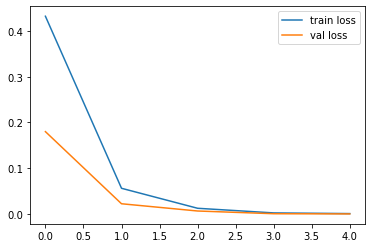

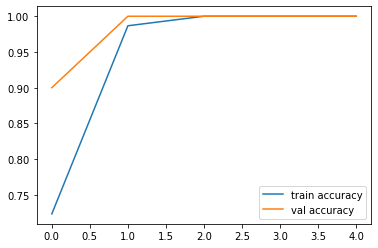

<Figure size 432x288 with 0 Axes>

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.python.keras import losses
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/home/aradhana/Desktop/FaceRecognition/Data/Train/'
valid_path = '/home/aradhana/Desktop/FaceRecognition/Data/Test/'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers[:16]:
  layer.trainable = False



folders = glob('/home/aradhana/Desktop/FaceRecognition/Data/Train/*')
print(len(folders))

# No of layers
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
#4, act = softmax

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/aradhana/Desktop/FaceRecognition/Data/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/home/aradhana/Desktop/FaceRecognition/Data/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
print(len(training_set))

print(len(test_set))

# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

#loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

##Saving the model
model.save('final_model.h5')